In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="Precision is ill-defined", category=UserWarning)
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.mean is deprecated", category=FutureWarning)

In [2]:
# Load the dataset
data = pd.read_csv('speed_data_data.csv')
data.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
gender       0
age         95
income    4099
goal        79
career      89
dec          0
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
like       240
prob       309
met        375
dtype: int64


In [4]:
data.shape

(8378, 15)

In [5]:
data_filled = data.fillna(data.mean())
missing_values_after_fill = data_filled.isnull().sum()
print("Missing values in each column after filling with mean:")
print(missing_values_after_fill)

Missing values in each column after filling with mean:
gender     0
age        0
income     0
goal       0
career    89
dec        0
attr       0
sinc       0
intel      0
fun        0
amb        0
shar       0
like       0
prob       0
met        0
dtype: int64


In [6]:
data_cleaned = data_filled.dropna()
missing_values_after_drop = data_cleaned.isnull().sum()
print("Missing values in each column after dropping rows with missing values:")
print(missing_values_after_drop)

Missing values in each column after dropping rows with missing values:
gender    0
age       0
income    0
goal      0
career    0
dec       0
attr      0
sinc      0
intel     0
fun       0
amb       0
shar      0
like      0
prob      0
met       0
dtype: int64


In [7]:
# Encode categorical variables
label_encoders = {}
for col in ['goal', 'career']:
    label_encoders[col] = LabelEncoder()
    data_cleaned.loc[:, col] = label_encoders[col].fit_transform(data_cleaned.loc[:, col])

# Split features and target variable
X = data_cleaned.drop(['dec'], axis=1)
y = data_cleaned['dec']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Train K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Train Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting Machine (XGBoost)
gbm_classifier = xgb.XGBClassifier()
gbm_classifier.fit(X_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)
nb_pred = nb_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
gbm_pred = gbm_classifier.predict(X_test)


# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
gbm_accuracy = accuracy_score(y_test, gbm_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred)
knn_precision = precision_score(y_test, knn_pred)
nb_precision = precision_score(y_test, nb_pred)
svm_precision = precision_score(y_test, svm_pred)
gbm_precision = precision_score(y_test, gbm_pred)

# Calculate RMSE for each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
nb_rmse = np.sqrt(mean_squared_error(y_test, nb_pred))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))

# Create confusion matrix for each model
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
gbm_conf_matrix = confusion_matrix(y_test, gbm_pred)

In [8]:
models = ['Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'GBM']
accuracy = [rf_accuracy, knn_accuracy, nb_accuracy, svm_accuracy, gbm_accuracy]
precision = [rf_precision, knn_precision, nb_precision, svm_precision, gbm_precision]
rmse = [rf_rmse, knn_rmse, nb_rmse, svm_rmse, gbm_rmse]

# Create a DataFrame
metrics_df = pd.DataFrame({'Model': models, 
                           'Accuracy': accuracy, 
                           'Precision': precision, 
                           'RMSE': rmse})

# Set Model column as index
metrics_df.set_index('Model', inplace=True)

print(metrics_df)

               Accuracy  Precision      RMSE
Model                                       
Random Forest  0.786490   0.790064  0.462072
KNN            0.768999   0.745938  0.480626
Naive Bayes    0.713510   0.644311  0.535247
SVM            0.568154   0.000000  0.657150
GBM            0.817853   0.805310  0.426787


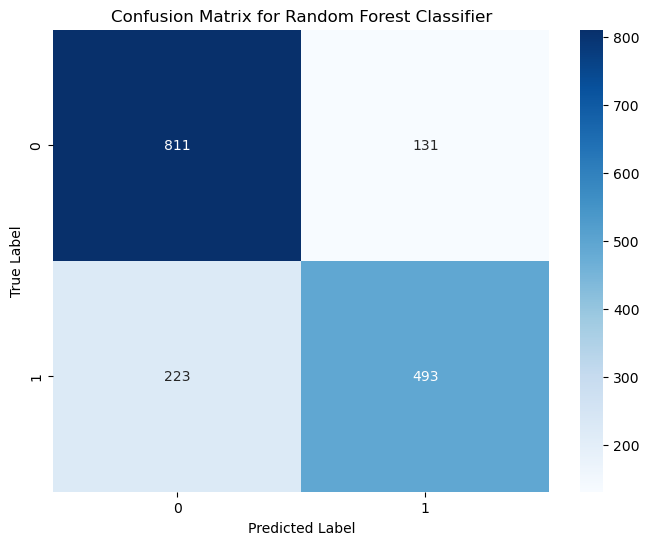

In [9]:
# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

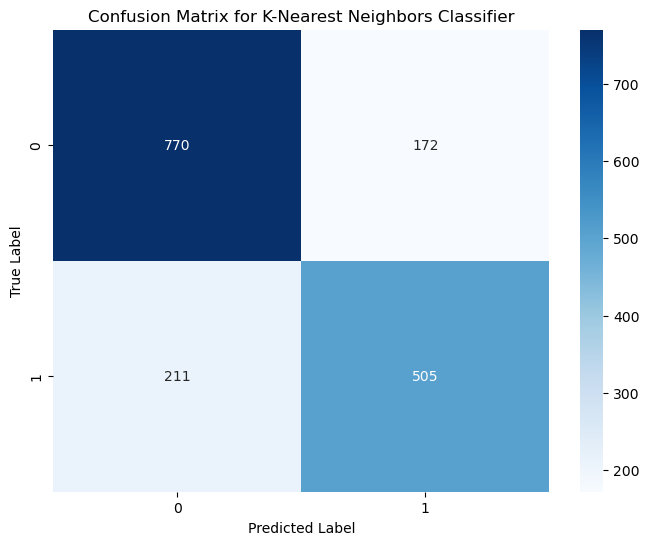

In [10]:
# Plot confusion matrix for K-Nearest Neighbors Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

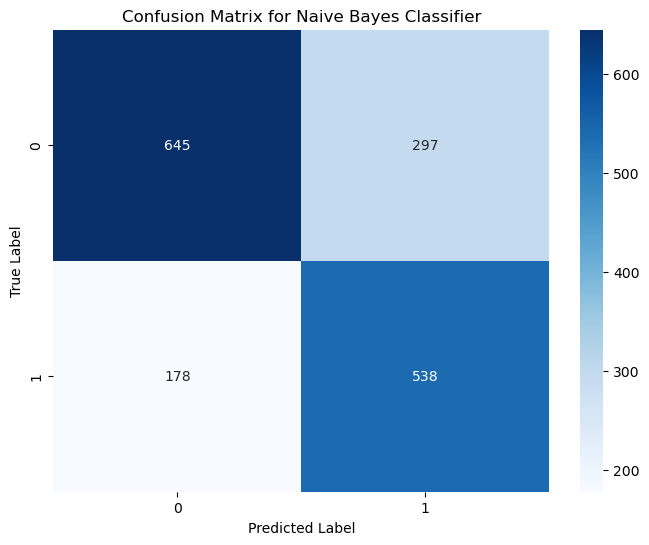

In [11]:
# Plot confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

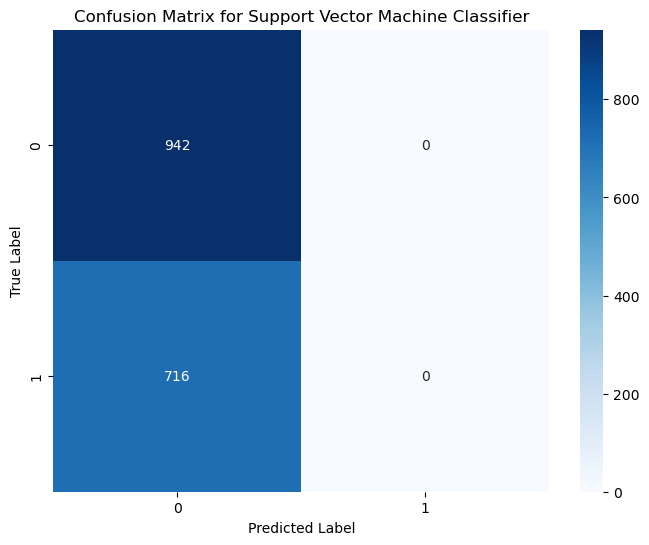

In [12]:
# Plot confusion matrix for Support Vector Machine Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

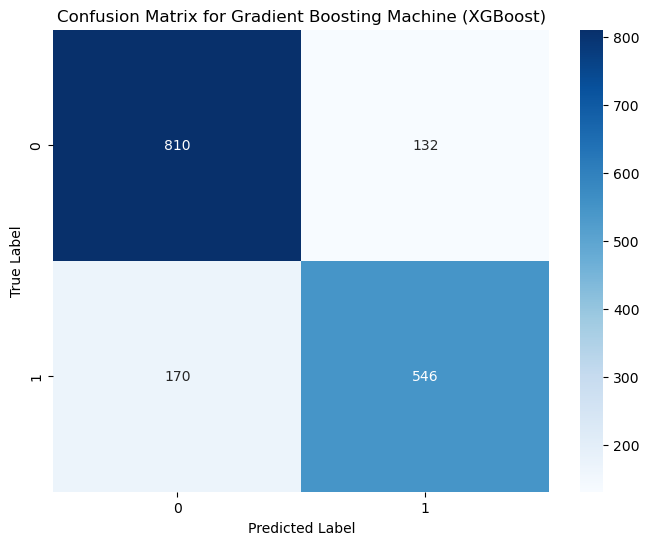

In [13]:
# Plot confusion matrix for Gradient Boosting Machine (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(gbm_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Gradient Boosting Machine (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

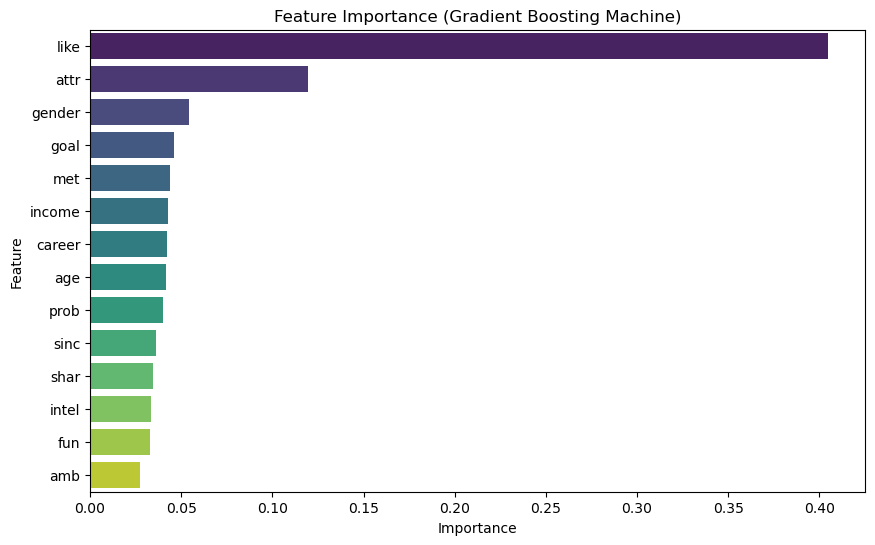

In [14]:
# Feature importance
feature_importance = gbm_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Create DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Gradient Boosting Machine)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()